In [1]:
library(e1071)
library(caret)
library(dplyr)
library(class)
library(forecast)
data(iris)
library(xts)

Warning message:
"package 'e1071' was built under R version 3.6.1"Warning message:
"package 'caret' was built under R version 3.6.1"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'class' was built under R version 3.6.1"Warning message:
"package 'forecast' was built under R version 3.6.1"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Warning message:
"package 'xts' was built under R version 3.6.1"Loading required pack

In [2]:

index<-createDataPartition(iris$Species,p=.7,list=FALSE)
data<-iris[index,]
test<-iris[-index,]

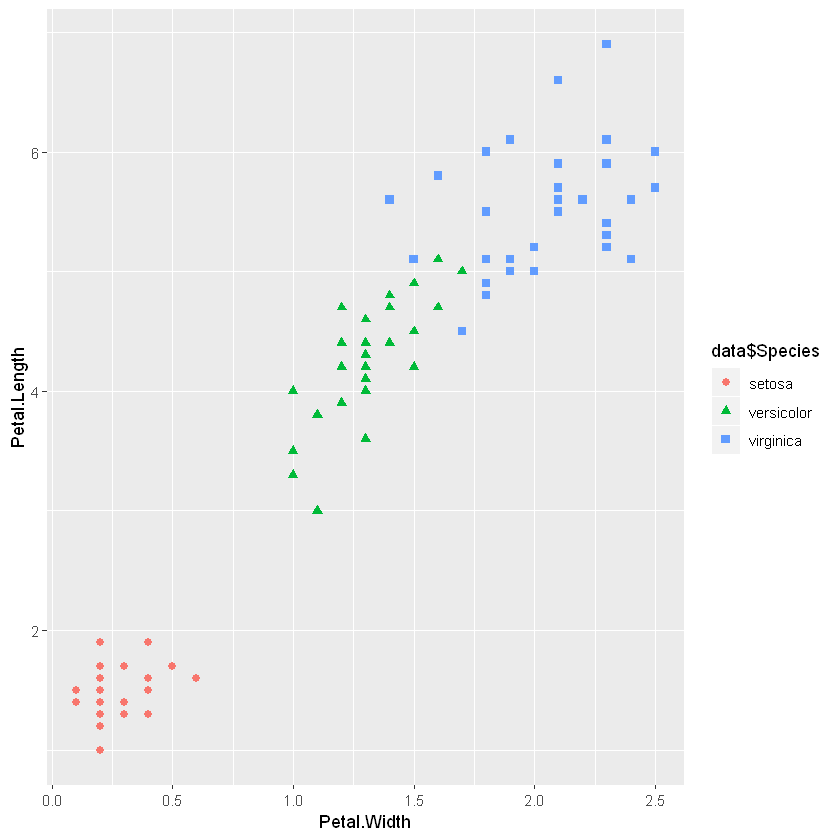

In [3]:
ggplot(data,aes(data$Petal.Width,data$Petal.Length,color=data$Species))+geom_point(aes(shape=data$Species),size=2)+xlab("Petal.Width")+ylab("Petal.Length")

In [4]:
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

###### support Vector Machine

In [5]:
modelsvm<-svm(Species~.,data=data,kernel="linear",cost=1)

In [6]:
predsvm<-predict(modelsvm,test, type="class")

In [7]:
confusionMatrix(predsvm,test[,5])

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         0
  virginica       0          1        15

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           1.0000
Specificity                 1.0000            1.0000           0.9667
Pos Pred Value              1.0000            1.0000           0.9375
Neg Pred Value              1.0000            0.9677           1.0000
P

In [8]:
trainknn <- as.data.frame(lapply(data[1:4], normalize))
train_labels<-data[,5]
testknn<-as.data.frame(lapply(test[1:4],normalize))
test_labels<-test[,5]

In [9]:
predictionknn<- knn(train = trainknn, test = testknn,cl = train_labels, k=13)

In [10]:

confusionMatrix(predictionknn,test_labels)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         0
  virginica       0          1        15

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           1.0000
Specificity                 1.0000            1.0000           0.9667
Pos Pred Value              1.0000            1.0000           0.9375
Neg Pred Value              1.0000            0.9677           1.0000
P

In [11]:
modelnb<-naiveBayes(Species~.,data=data)

In [12]:
predictionsb<-predict(modelnb,test)

In [13]:

confusionMatrix(predictionsb,test_labels)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          1        14

Overall Statistics
                                          
               Accuracy : 0.9556          
                 95% CI : (0.8485, 0.9946)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9333          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.9333
Specificity                 1.0000            0.9667           0.9667
Pos Pred Value              1.0000            0.9333           0.9333
Neg Pred Value              1.0000            0.9667           0.9667
P